### 1.Analysing feature behaviour based on synthetic data

In [1]:

import json
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import os
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rc


In [2]:
doc_path= ('/media/ak/WorkDrive/Data/')
figures_path= ('/home/ak/Documents/Research/Papers/figures/')
# os.listdir(figures_path)


In [3]:
##helper functions for plotting##
def plot_set(df):
    for i in [1,5,10,100]:
        x= np.asarray(df.iloc[:,10*i].expanding().mean())
        plt.plot(x,linestyle='--', label =str(10*i)+'-slices')

def plot_single_sequence(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(10).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, y, 'k-',linewidth=0.9)
    plt.fill_between(x, y-error, y+error, alpha=0.8, edgecolor='#1B2ACD', facecolor='#fff4f2',
                         linewidth=0.4, linestyle='dashdot', antialiased=False)
    
    plt.legend([str(seq_no)+'-th time slice'])

def plot_single_sequence_error(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(1).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, error, linestyle='dashdot',linewidth=0.9, color='r')
    plt.legend([str(seq_no)+'-th time slice '])

## Two states with skewed transition matrix favouring one state and static parameters that are sufficiently apart. We create state sequences of fixed length and for every fixed length sequence we generate M copies of observation data from the observation distribution.¶


In [4]:
ticker = 'SYNT_2states'
main_path = '/media/ak/WorkDrive/Data/features_models/'
file_name = 'synthetic_study_' + str(ticker)


In [5]:
#search only for npy files+make a list --> will use this later
npy_files= [s for s in os.listdir(main_path) if s.endswith('.npy')]
#isolating the files with the sequence of 10k and with 2,3,4 states
fisher_files_10k = [s for s in os.listdir(main_path) if s.startswith('fischer_polar') and ('len10000states2') in s]
states_files_10k = [s for s in os.listdir(main_path) if s.startswith('fixed_states') and ('len10000') in s]
npy_files

['fischer_polar_len10000states4.npy',
 'im_metrics_len10000states2.npy',
 'ksi_metrics_len10000states2.npy',
 'im_metrics_len10000states4.npy',
 'ksi_metrics_len10000states4.npy',
 'fischer_polar_len10000states2.npy',
 'fixed_states_len10000_states2.npy',
 'fixed_states_len10000_states4.npy']

In [6]:
fisher_2s =np.load(main_path+str(fisher_files_10k[0]))
####
states_2= np.load(main_path+str(states_files_10k[0]))


In [24]:
print (len(states_2[states_2==0]))
print (len(states_2[states_2==1]))

6735
3265


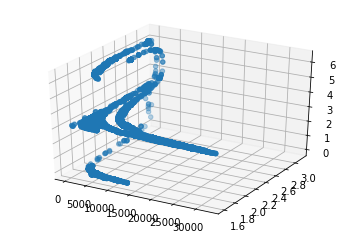

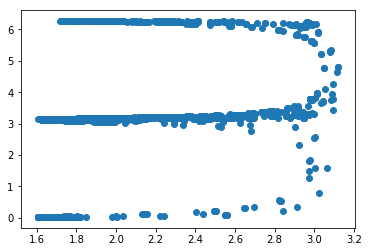

In [8]:
j=0
i=0

rho = pd.DataFrame(fisher_2s[i])[j].values
phi1 = pd.DataFrame(fisher_2s[i])[j+1].values
phi2 = pd.DataFrame(fisher_2s[i])[j+2].values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#shape: copies x sequence x number of inputs
ax.scatter(rho, phi1, phi2)
plt.show()
plt.scatter(phi1, phi2, marker='o')
plt.show()

In [9]:
df_fischer_4=pd.DataFrame()
df_fischer_4['states']=states_2
df_fischer_4['rho'] = pd.DataFrame(fisher_2s[i])[j].values
df_fischer_4['phi1'] = pd.DataFrame(fisher_2s[i])[j+1].values
df_fischer_4['phi2'] = pd.DataFrame(fisher_2s[i])[j+2].values



In [10]:
df_fischer_4.head(2)

,states,rho,phi1,phi2
0,1,33.170185,3.066152,1.570796
1,1,31.476491,3.004176,1.570796


In [11]:


df_fischer_state1= df_fischer_4[df_fischer_4['states'] == 0]
df_fischer_state2= df_fischer_4[df_fischer_4['states'] == 1]
# df_fischer_state3= df_fischer_4[df_fischer_4['states'] == 2]
# df_fischer_state4= df_fischer_4[df_fischer_4['states'] == 3]

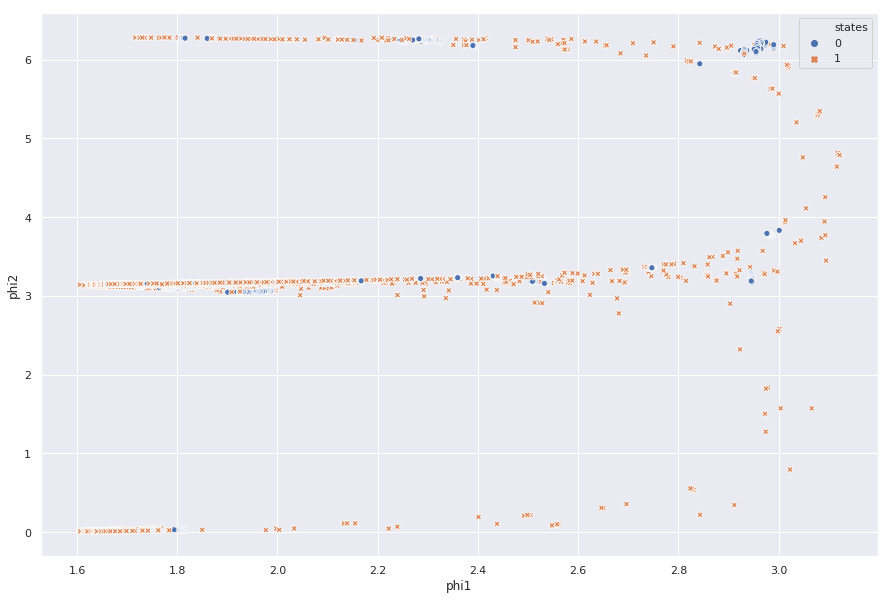

In [12]:
plt.figure(figsize=(15,10)) 
sns.set()
import matplotlib.pyplot as plt
sns.scatterplot(x="phi1", y="phi2", hue="states",style="states",data=df_fischer_4)


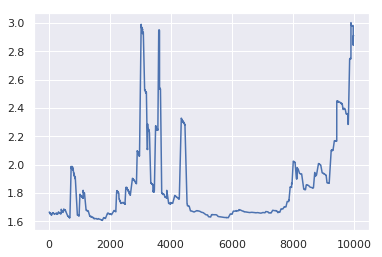

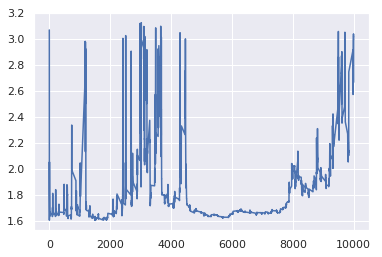

In [13]:
df_fischer_state1['phi1'].plot()
plt.show()
df_fischer_state2['phi1'].plot()
plt.show()
# df_fischer_state3['phi1'].plot()
# plt.show()
# df_fischer_state4['phi1'].plot()

Text(0.5,1,'Fischer Polar Coordinates')

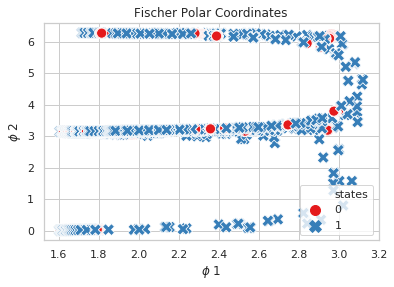

In [14]:
sns.set()
# sns.set_context("notebook", font_scale=1.1)
# sns.set_style("ticks")
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="phi1", y="phi2",
                hue="states", sizes=(140, 100), hue_norm=(2, 7),
                style="states", size ="states",
                legend="full",palette="Set1",
                data=df_fischer_4)
plt.ylabel(r'$\phi$ 2')
plt.xlabel(r'$\phi$ 1')
plt.title('Fischer Polar Coordinates')

Text(31.974,0.5,'$\\phi$ 2')

<Figure size 1080x720 with 0 Axes>

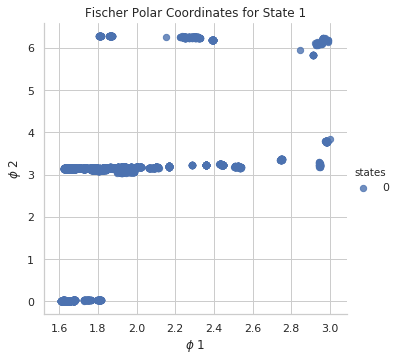

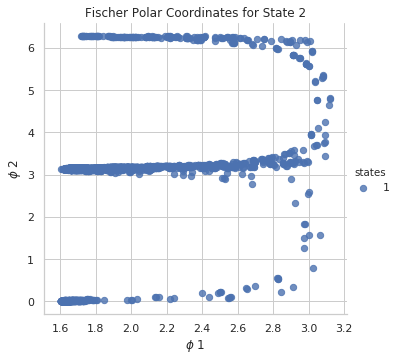

In [15]:
# Set style of scatterplot
plt.figure(figsize=(15,10)) 
# sns.set_context("notebook", font_scale=1.1)
# sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('phi1', # Horizontal axis
           'phi2', # Vertical axis
           data=df_fischer_state1, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="states", # Set color
           scatter_kws={"marker": "x", # Set marker style
                        "s": 40}) # S marker size
# Set title
plt.title('Fischer Polar Coordinates for State 1')

# Set x-axis label
plt.xlabel(r'$\phi$ 1')

# Set y-axis label
plt.ylabel(r'$\phi$ 2')

# Create scatterplot of dataframe
sns.lmplot('phi1', # Horizontal axis
           'phi2', # Vertical axis
           data=df_fischer_state2, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="states", # Set color
           scatter_kws={"marker": "o", # Set marker style
                        "s": 40}) # S marker size
# Set title
plt.title('Fischer Polar Coordinates for State 2')

# Set x-axis label
plt.xlabel(r'$\phi$ 1')

# Set y-axis label
plt.ylabel(r'$\phi$ 2')

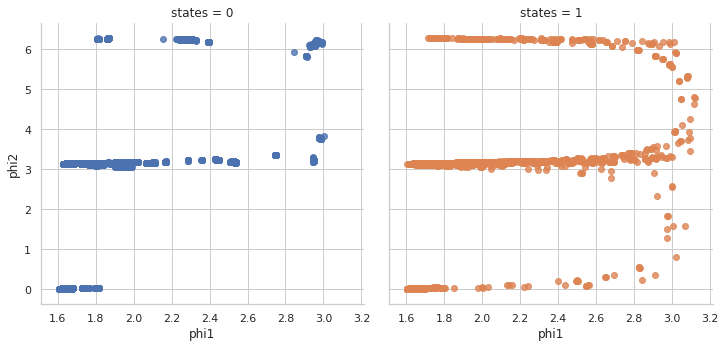

In [16]:
sns.lmplot(data=df_fischer_4,
           x='phi1',
           y='phi2',
           hue='states',
           col_wrap=3,
           col='states',
          sharex=True,
           sharey=True,
          fit_reg=False)
# Create scatterplot of dataframe


In [17]:
# k=1
# # Set up the matplotlib figure
# sns.despine(left=True)
# sns.distplot(df_fischer_state0[k], kde=True, color="b")
# title_1 = 'Vector '+r'$\phi_'+str(k)+'$ at state 1'
# plt.title('Distribution for State 1')
# plt.xlabel(title_1)
# plt.savefig(figures_path+title_1+'.png') 
# plt.show()
# sns.distplot(df_fischer_state1[k], kde=True, color="r")
# title_2 = 'Vector '+r'$\phi_'+str(k)+'$ at state 2'
# plt.title('Distribution for State 2')
# plt.xlabel(title_2)
# plt.show()

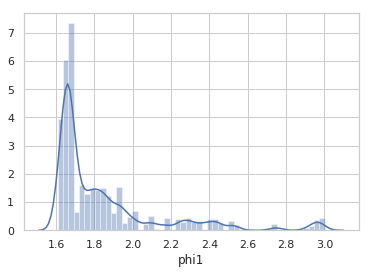

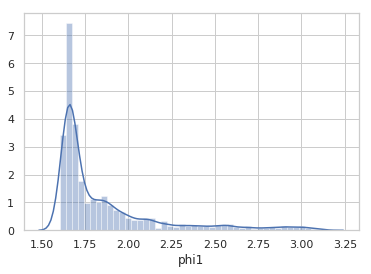

In [25]:
sns.distplot(df_fischer_state1['phi1'])
plt.show()
sns.distplot(df_fischer_state2['phi1'])
plt.show()
# sns.distplot(df_fischer_state3['phi1'])
# plt.show()
# sns.distplot(df_fischer_state4['phi1'])

In [26]:
import copy
df_copy=copy.deepcopy(df_fischer_4)

In [27]:
df_copy['change_state']=abs(df_copy['states'].diff())

In [28]:
df_copy.groupby('states').mean()

,rho,phi1,phi2,change_state
states,,,,
0,10361.574424,1.84682,3.035788,0.011136
1,10422.400406,1.85412,2.928890,0.022978


In [29]:
df_copy.groupby('change_state').mean()

,states,rho,phi1,phi2
change_state,,,,
0.0,0.323789,10384.062678,1.848944,3.000749
1.0,0.500000,10277.830596,1.858160,3.019396
